In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualizing data

In [2]:
#dataset
fruits = pd.read_table('/content/fruit_data_with_colors.txt')

In [3]:
#checking first five rows of our dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [6]:
#Now we will store all unique data on four different dataframes.

apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']

In [7]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [8]:
mandarin_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81


In [9]:
orange_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
28,3,orange,selected_seconds,140,6.7,7.1,0.72


In [10]:
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


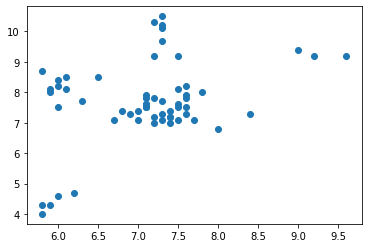

In [11]:
#By looking above data, it is shown that for every fruit there is a fruit_label. For apple it is 1, for mandarin it is 2, for orange it is 3 and for lemon it is 4. Now we will visualize this data on plots for further exploration.
plt.scatter(fruits['width'],fruits['height'])

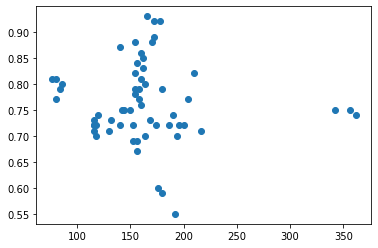

In [12]:
plt.scatter(fruits['mass'],fruits['color_score'])

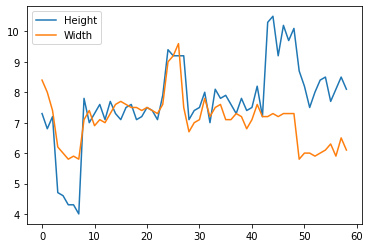

In [13]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=123)

In [16]:
X_train.describe()

,mass,width,height
count,44.000000,44.000000,44.000000
mean,160.545455,7.061364,7.695455
std,52.227345,0.743410,1.443341
min,76.000000,5.800000,4.000000
25%,140.000000,6.650000,7.175000
50%,156.000000,7.200000,7.550000
75%,174.500000,7.400000,8.275000
max,356.000000,9.200000,10.500000


In [17]:
X_test.describe()

,mass,width,height
count,15.000000,15.000000,15.000000
mean,170.666667,7.233333,7.686667
std,63.882332,1.021670,1.129391
min,80.000000,5.800000,4.300000
25%,137.000000,6.550000,7.400000
50%,164.000000,7.300000,7.700000
75%,186.000000,7.600000,8.150000
max,362.000000,9.600000,9.200000


In [18]:
knn=KNeighborsClassifier()

In [19]:
#train data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
#accuracy
knn.score(X_test,y_test)

0.5333333333333333

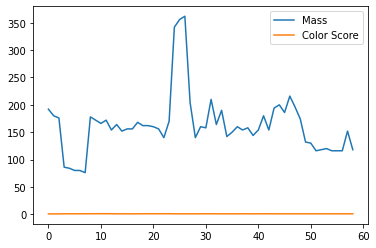

In [21]:
plt.plot(fruits['mass'],label='Mass')
plt.plot(fruits['color_score'],label='Color Score')
plt.legend()